In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random as rand
from math import e
from tqdm import tqdm
from scipy import integrate
import random

In [ ]:
#v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)

def game(v,macrosteps,pars):
                 
    N = len(v)
    vec_a_mean=[]           #empty vector to be filled with the mean value of alpha at each for loop
    vec_x=[]                #empty vector to be filled with the fraction of cooperators at each for loop
    s1_vec=v[:,1]
    a1_vec=v[:,0]     
    T= -pars['p']*pars['cd']*(1-pars['d'])
    P= -pars['p']*pars['cd']
    
    for t in macrosteps:
        
        v = np.transpose(np.array([a1_vec,s1_vec]))
        amean = np.mean(v[:,0])                       #updated mean of alpha
        vec_a_mean = np.append(vec_a_mean, amean)   
        x = np.mean(v[:,1])                           #updated fraction of cooperators
        vec_x = np.append(vec_x, x)        
        cumulative_payoffs=[]  
        pi = np.zeros(N)
        s1_vec=[]
        a1_vec=[]
        
        for player in range(N):
            a1,s1 = v[player]
            
            R= -pars['p']*pars['cd']*(1-pars['e'])*(1-pars['d'])-(1-a1)*pars['cn']
            S= -pars['p']*pars['cd']*(1-pars['e'])-(1-a1)*pars['cn']
            
            pp= s1*x*(N-1)*R + s1*(1-x)*N*S + (1-s1)*x*N*T + (1-s1)*(1-x)*(N-1)*P
            
            cumulative_payoffs = np.append(cumulative_payoffs,pp)
                
        for pos1 in range(N):
            pos2 = random.choice(list(range(0,pos1)) + list(range(pos1+1,N)))
            a1,s1 = v[pos1]                       #alpha,strategy of player 1
            s2 = v[pos2][1]                       #strategy of player 2
            
            if s1==s2: 
                s1_new = s1
            
            else:
                pi_1=cumulative_payoffs[pos1]
                pi_2=cumulative_payoffs[pos2]
                delta_pi = pi_2-pi_1              
                prob = 1/(1+e**(-pars['beta']*delta_pi))
                
                s1_new = s2 if np.random.random() < prob else s1
            
            a1_new = a1 + pars['gamma']*(2*x-1)*a1*(1-a1)
            a1_new = np.clip(a1_new, 0.001, 0.999)
                
            s1_vec=np.append(s1_vec,s1_new)
            a1_vec=np.append(a1_vec,a1_new)
        
        if np.isin(s1_vec, 0).all() or np.isin(s1_vec, 1).all():
            break
        
    return v, vec_x, vec_a_mean, np.mean(s1_vec), np.mean(a1_vec)

In [ ]:
# Parameters
pars={}         
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.25
pars['gamma']=1
pars['beta']=0.01

N=20   
macrosteps = np.linspace(0,10000,10000)
al = 0.5*np.ones(N)
f425001_5_0=[]

for c in range(21):
    final_coop_vec=[]
    
    for i in tqdm(range(10000), desc = 'Progress Bar'):
        n_coop=c                        #number of cooperators
        nums = np.zeros(N)
        nums[:n_coop] = 1
        np.random.shuffle(nums)          #vector containing the strategies of the players (random vector of 1 and 0)
        
        v = np.transpose(np.array([al,nums]))
        r = game(v,macrosteps,pars)
        
        final_coop_vec = np.append(final_coop_vec,r[3])
        
    f425001_5_0 = np.append(f425001_5_0,  final_coop_vec.mean())

Progress Bar: 100%|██████████| 10000/10000 [00:04<00:00, 2333.38it/s]


In [ ]:
# Parameters
pars={}         
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.5
pars['gamma']=1
pars['beta']=0.01

N=20   
macrosteps = np.linspace(0,10000,10000)
al = 0.5*np.ones(N)
f45001_5_0=[]

for c in range(21):
    final_coop_vec=[]
    
    for i in tqdm(range(10000), desc = 'Progress Bar'):
        n_coop=c                        #number of cooperators
        nums = np.zeros(N)
        nums[:n_coop] = 1
        np.random.shuffle(nums)          #vector containing the strategies of the players (random vector of 1 and 0)
        
        v = np.transpose(np.array([al,nums]))
        r = game(v,macrosteps,pars)
        
        final_coop_vec = np.append(final_coop_vec,r[3])
        
    f45001_5_0 = np.append(f45001_5_0,  final_coop_vec.mean())

Progress Bar: 100%|█████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 448.49it/s]


In [ ]:
# Parameters
pars={}         
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.75
pars['gamma']=1
pars['beta']=0.01

N=20   
macrosteps = np.linspace(0,10000,10000)
al = 0.5*np.ones(N)
f475001_5_0=[]

for c in range(21):
    final_coop_vec=[]
    
    for i in tqdm(range(10000), desc = 'Progress Bar'):
        n_coop=c                        #number of cooperators
        nums = np.zeros(N)
        nums[:n_coop] = 1
        np.random.shuffle(nums)          #vector containing the strategies of the players (random vector of 1 and 0)
        
        v = np.transpose(np.array([al,nums]))
        r = game(v,macrosteps,pars)
        
        final_coop_vec = np.append(final_coop_vec,r[3])
        
    f475001_5_0 = np.append(f475001_5_0,  final_coop_vec.mean())

Progress Bar: 100%|█████████████████████████████████████████████████████████████| 10000/10000 [00:37<00:00, 265.34it/s]


In [ ]:
#np.savetxt('f425001_5_0.txt',f425001_5_0)
#np.savetxt('f45001_5_0.txt',f45001_5_0)
#np.savetxt('f475001_5_0.txt',f475001_5_0)

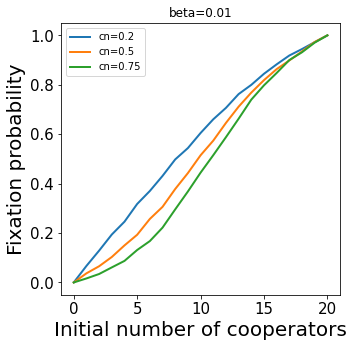

In [ ]:
fig1,ax = plt.figure(figsize=(5, 5)), plt.axes()
plt.plot(np.arange(21),f425001_5_0,linewidth=2, label='cn=0.2')
plt.plot(np.arange(21),f45001_5_0,linewidth=2, label='cn=0.5')
plt.plot(np.arange(21),f475001_5_0,linewidth=2, label='cn=0.75')
plt.legend()
plt.xlabel('Initial number of cooperators',fontsize=20)
plt.ylabel('Fixation probability',fontsize=20)
plt.title('beta=0.01')
ax.tick_params(labelsize=15)
plt.show()